In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4.0,130.0,322.0,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3.0,115.0,564.0,0,2,160.0,NaN,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,124.0,261.0,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,NaN,2.0,120.0,269.0,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3.0,172.0,199.0,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2.0,120.0,263.0,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,NaN,140.0,294.0,0,2,153.0,0.0,1.3,NaN,0.0,3.0
268,1.0,57.0,NaN,140.0,192.0,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	7
float64		column 3	29
float64		column 4	21
float64		column 5	22
int64		column 6	0
int64		column 7	0
float64		column 8	14
float64		column 9	28
float64		column 10	8
float64		column 11	14
float64		column 12	14
float64		column 13	7


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,263.000000,241.000000,249.000000,248.000000,270.000000,270.000000,256.000000,242.000000,262.000000,256.000000,256.000000,263.000000
mean,0.680608,54.532319,3.207469,130.859438,248.822581,0.148148,1.022222,149.730469,0.334711,1.065649,1.570312,0.648438,4.726236
std,0.467130,9.042199,0.916576,17.302582,51.005286,0.355906,0.997891,22.907521,0.472867,1.151928,0.609514,0.921123,1.944152
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.750000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,244.500000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,275.250000,0.000000,2.000000,165.250000,1.000000,1.750000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

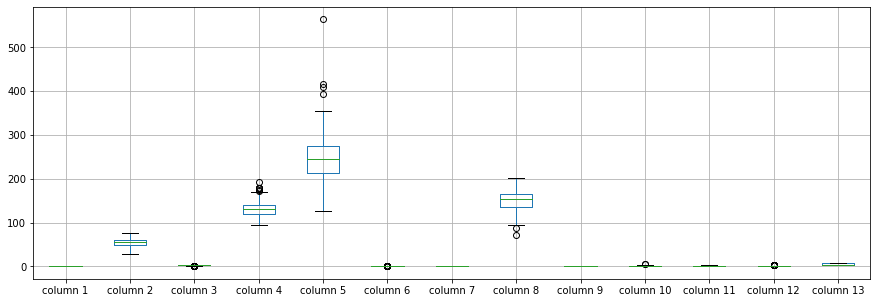

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680608
column 2      54.532319
column 3       3.207469
column 4     130.859438
column 5     248.822581
column 6       0.148148
column 7       1.022222
column 8     149.730469
column 9       0.334711
column 10      1.065649
column 11      1.570312
column 12      0.648438
column 13      4.726236
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.078806,0.008753,-0.037936,-0.166451,0.040324,0.023546,-0.083810,0.160709,0.088846,0.045346,0.082884,0.380599
column 2,-0.078806,1.000000,0.171779,0.264873,0.174770,0.121669,0.136782,-0.404064,0.072568,0.192077,0.182463,0.353650,0.127016
column 3,0.008753,0.171779,1.000000,-0.023197,0.091089,-0.067744,0.136522,-0.328245,0.304081,0.183870,0.204056,0.218796,0.248017
column 4,-0.037936,0.264873,-0.023197,1.000000,0.157265,0.140563,0.088069,-0.007290,0.122829,0.192091,0.092904,0.058628,0.109528
column 5,-0.166451,0.174770,0.091089,0.157265,1.000000,0.029412,0.162448,-0.007476,0.131121,-0.010889,0.011593,0.081459,0.013916
column 6,0.040324,0.121669,-0.067744,0.140563,0.029412,1.000000,0.053499,0.031834,0.024357,-0.019747,0.042049,0.147710,0.043382
column 7,0.023546,0.136782,0.136522,0.088069,0.162448,0.053499,1.000000,-0.086397,0.082048,0.129277,0.140029,0.088317,0.002693
column 8,-0.083810,-0.404064,-0.328245,-0.007290,-0.007476,0.031834,-0.086397,1.000000,-0.403408,-0.349297,-0.414257,-0.276389,-0.289498
column 9,0.160709,0.072568,0.304081,0.122829,0.131121,0.024357,0.082048,-0.403408,1.000000,0.294130,0.235240,0.138953,0.348652
column 10,0.088846,0.192077,0.183870,0.192091,-0.010889,-0.019747,0.129277,-0.349297,0.294130,1.000000,0.623969,0.262715,0.347193


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+18,13+18+18,13+18+18+18,13+18+18+18+18,13+18+18+18+18+18,13+18+18+18+18,13+18+18+18,13+18+18,13+18,13], vae_layer = False, seed = 18)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 564.6443767547607
Epoch: 1 , loss: 568.1912307739258
Epoch: 2 , loss: 565.9564056396484
Epoch: 3 , loss: 568.6022453308105
Epoch: 4 , loss: 567.840841293335
Epoch: 5 , loss: 565.4162788391113
Epoch: 6 , loss: 568.1067409515381
Epoch: 7 , loss: 569.8499870300293
Epoch: 8 , loss: 570.2549209594727
Epoch: 9 , loss: 567.3388595581055
Epoch: 10 , loss: 566.070478439331
Epoch: 11 , loss: 566.8754863739014
Epoch: 12 , loss: 569.9578132629395
Epoch: 13 , loss: 565.153507232666
Epoch: 14 , loss: 568.963695526123
Epoch: 15 , loss: 566.4548721313477
Epoch: 16 , loss: 569.2185897827148
Epoch: 17 , loss: 567.9611167907715
Epoch: 18 , loss: 566.8207931518555
Epoch: 19 , loss: 564.0188293457031
Epoch: 20 , loss: 568.2036094665527
Epoch: 21 , loss: 566.6894149780273
Epoch: 22 , loss: 565.632740020752
Epoch: 23 , loss: 564.4614963531494
Epoch: 24 , loss: 568.377347946167
Epoch: 25 , loss: 567.1284828186035
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.053657,0.0,0.000000,0.000000,0.0
2,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,-73.110792,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
266,0.0,0.000000,0.000000,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0
267,0.0,0.000000,-1.796431,0.0,0.0,0,0,0.0,0.000000,0.0,-1.824667,0.000000,0.0
268,0.0,0.000000,-3.650636,0.0,0.0,0,0,0.0,0.000000,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1502.4296853845055, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.27746969326223225

In [18]:
new_df.iloc[66,:]

column 1       1.000000
column 2      51.000000
column 3       4.000000
column 4     140.000000
column 5     261.000000
column 6       0.000000
column 7       2.000000
column 8       1.786045
column 9       1.000000
column 10      0.000000
column 11      1.000000
column 12      0.000000
column 13      3.000000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.000000,4.000000,130.0,322.0,0,2,109.0,0.000000,2.4,2.000000,3.000000,3.0
1,0.0,67.000000,3.000000,115.0,564.0,0,2,160.0,0.053657,1.6,2.000000,0.000000,7.0
2,1.0,57.000000,2.000000,124.0,261.0,0,0,141.0,0.000000,0.3,1.000000,0.000000,7.0
3,1.0,64.000000,4.000000,128.0,263.0,0,0,105.0,1.000000,0.2,2.000000,1.000000,7.0
4,0.0,0.889208,2.000000,120.0,269.0,0,2,121.0,1.000000,0.2,1.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.000000,3.000000,172.0,199.0,1,0,162.0,0.000000,0.5,1.000000,0.000000,7.0
266,1.0,44.000000,2.000000,120.0,263.0,0,0,173.0,0.000000,0.0,1.000000,0.000000,7.0
267,0.0,56.000000,0.203569,140.0,294.0,0,2,153.0,0.000000,1.3,0.175333,0.000000,3.0
268,1.0,57.000000,0.349364,140.0,192.0,0,0,148.0,0.000000,0.4,2.000000,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_NE_5(imp).xlsx", index=False, header=False)